# Amtrak ridership analysis
The project analysis the ridership of amtrak.It is a time series problem which we seek to solve using naive forecast.
Let us start by installing our dependencies.   

In [37]:
# Installing Packages

install.packages('forecast')
install.packages('ggplot2')
install.packages('ggthemes')
install.packages('ggfortify')

In [26]:
# Calling library

library('forecast')
library('ggplot2')
library('ggthemes')
library('ggfortify')

In [40]:
# Read 

Amtrak.data <- read.csv("Amtrak data.csv")

### Converting to time series
Creating a time series(ts). ts() takes three arguments: start, end, and freq. with monthly data, the frequency of periods per season is 12 (per year). arguments start and end are (season number, period number) pairs. We choose our dates from Jan 1991 to march 2004. Hence the satrt and end dates 

In [41]:
# Converting to time series

ridership.ts <- ts(Amtrak.data$Ridership, 
                   start = c(1991, 1), end = c(2004, 3), freq = 12)

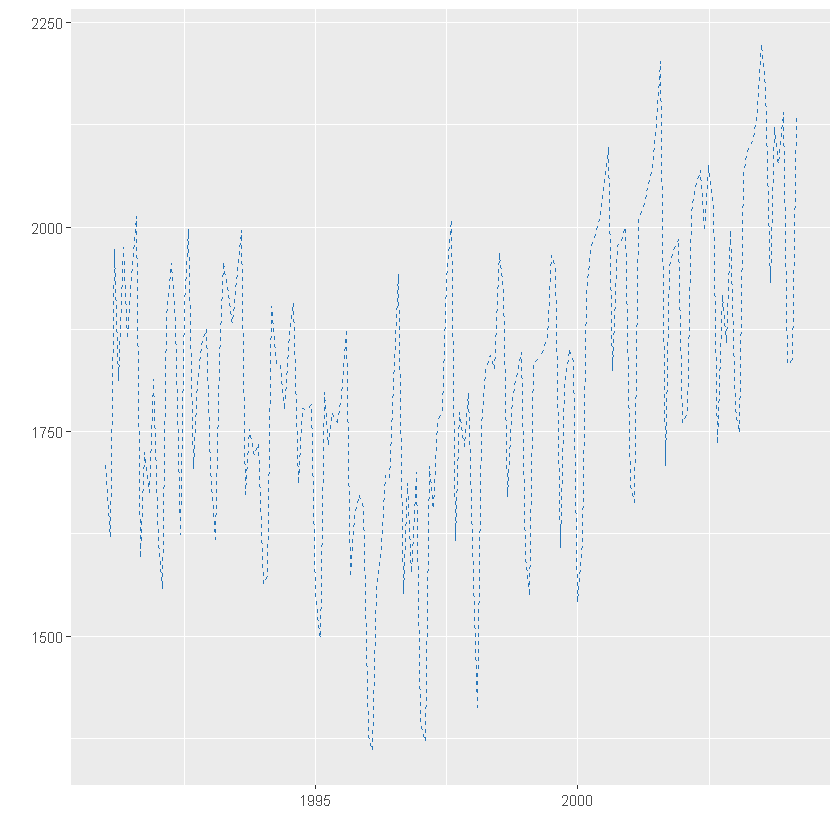

In [29]:
# Plot ts

autoplot(ridership.ts, ts.colour = '#2676ba', ts.linetype ='dashed' ) 

## Linear regression
Let us fit a model to the the ts() from Jan 1997 till Dec 1999

In [42]:
# 3 years later

ridership.ts.3yrs <- window(ridership.ts, start = c(1997, 1), end = c(1999, 12))

In [43]:
# Fit linear regression to ts

ridership.lm <- tslm(ridership.ts ~ trend + I(trend^2))

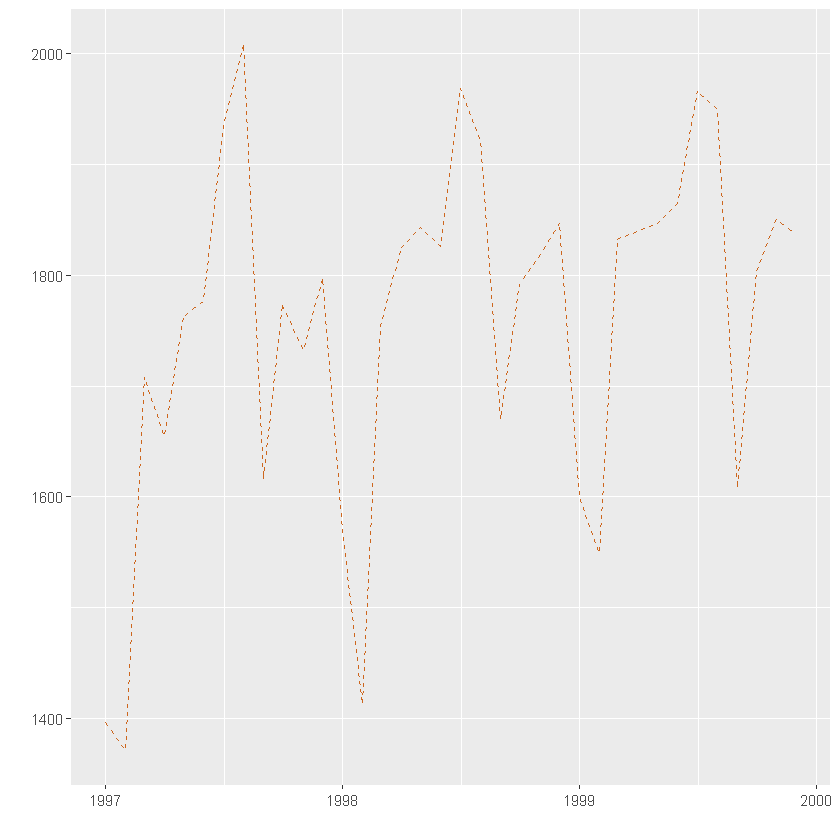

In [44]:
# Plot ts for next three years

autoplot(ridership.ts.3yrs,ts.linetype = 'dashed', ts.colour= '#cd661d')

## Forecasts
Define a dummy variable to define the three years from start and lets split the data to train and valid.

In [45]:
# Variables for reusing the 3 years time period

nValid <- 36
nTrain <- length(ridership.ts) - nValid

# partition the data

train.ts <- window(ridership.ts, start = c(1991, 1), end = c(1991, nTrain))
valid.ts <- window(ridership.ts, start = c(1991, nTrain + 1), 
                   end = c(1991, nTrain + nValid))

In [46]:
#  naive and seasonal naive forecasts

naive.pred <- naive(train.ts, h = nValid)
snaive.pred <- snaive(train.ts, h = nValid)

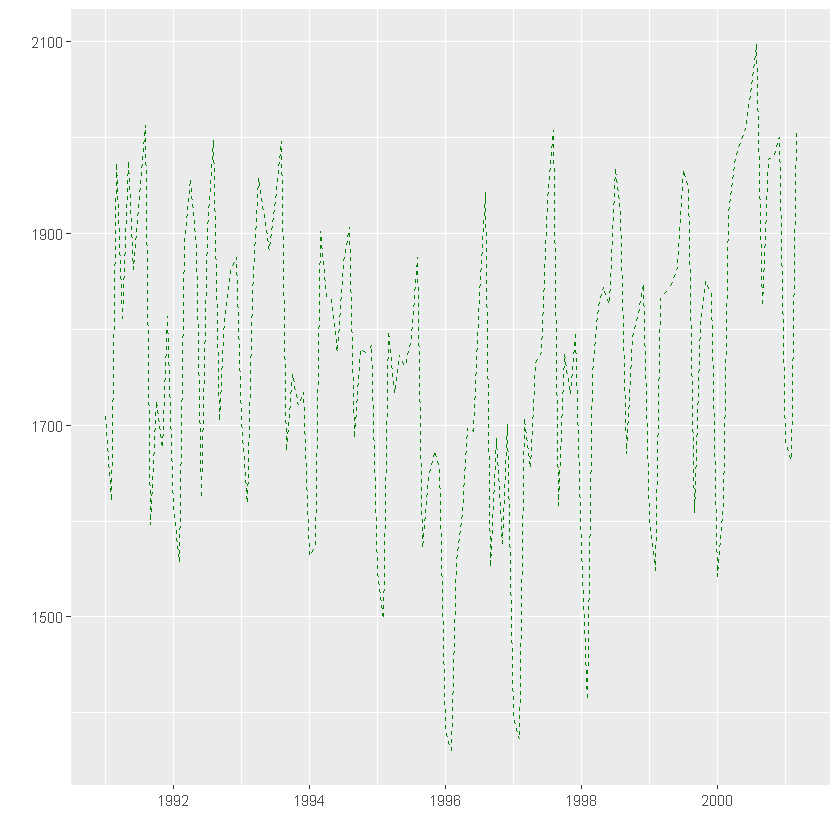

In [47]:
# plot

autoplot(train.ts, ts.linetype= 'dashed', ts.colour = '#008000')

### naive prediction is only used as a way to measure our model's fit 

In [48]:
accuracy(naive.pred, valid.ts)
accuracy(snaive.pred, valid.ts)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,2.45091,168.1470,125.2975,-0.3460027,7.271393,1.518906,-0.2472621,NA
Test set,-14.71772,142.7551,115.9234,-1.2749992,6.021396,1.405269,0.2764480,0.8346967


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,13.93991,99.26557,82.49196,0.5850656,4.715251,1.000000,0.6400044,NA
Test set,54.72961,95.62433,84.09406,2.6527928,4.247656,1.019421,0.6373346,0.5532435
